# DataPreprocessing2





In [3]:
import numpy as np
import pandas as pd

In [4]:
tweet_data=pd.read_csv('./tweets.csv')

In [5]:
tweets = tweet_data.groupby('username').filter(lambda x : len(x)<1000)
print(len(tweets))

5711375


In [6]:
# remove noise words
noise_words = ['free', 'freebitcoin', 'freeminingsoftware', 'freebitco', 'free bitcoin', 'makemoney', 'make money',
          'abtcl', 'tradingtool', 'trading tool', 'residualbitcoin', 'faucet', 'casino',
          'simplefx', 'nitrogensportsbook', 'makeyourownlane', 'bet', 'bitcoinbet', 'webbot', 'win', 'game', 'lottery',
          'bitcoinprice','bitcoin price' , 'mpgvip', 'footballcoin', 'earnbitcoin', 'earn bitcoin',
           'trading', 'price', 'performing currency', 'altcoin', 'fintech', 'pic']

In [7]:
tweets = tweets[~tweets.text.str.contains('|'.join(noise_words))]

Text(0.5, 1.0, 'histogram of number of words in tweet')

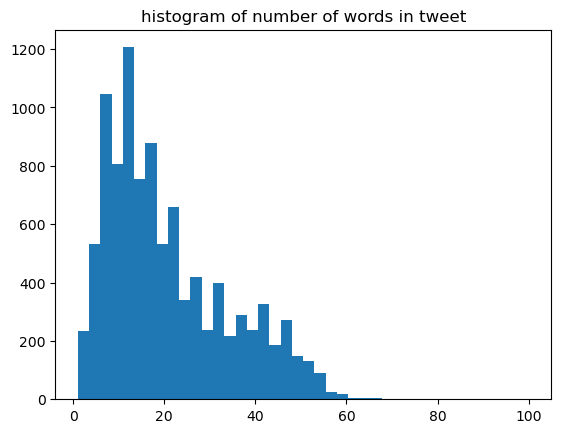

In [8]:
import matplotlib.pyplot as plt
plt.hist(tweets['text'][:10000].apply(lambda x:x.split(' ')).apply(len), bins=40)
plt.title('histogram of number of words in tweet')

In [9]:
# keep tweets which length is between 5 and 60 words
def drop_by_length(text, low, high):
  l = len(text.split(' '))
  if (l>=low) and (l<=high):
    return True
  else:
    return False

In [10]:
#time
tweets = tweets[tweets['text'].apply(lambda x: drop_by_length(x,5,60))]

In [11]:
tweets

,datetime,username,text
0,2022-01-01 23:00:00,priconoticias,0.4MOT TOKENS IN #LATOKEN airdrop and maybe m...
1,2022-01-01 23:00:00,mmonlineonline,MARA for Bitcoin Exposure: Top Trade Q1 2022 h...
2,2022-01-01 23:00:00,CoachKevinRose,Every Time the Bell Rings The Titano makes MON...
3,2022-01-01 23:00:00,robert54177167,If your interested in losing money in 2022 kee...
5,2022-01-01 23:00:00,CommodoreBTC,@JesseKellyDC Money is at the root of every in...
...,...,...,...
8173347,2022-06-30 00:00:00,th_tradingview,#BTCUSD - #Elliottwave #BTCUSD #Bitcoin #Ellio...
8173348,2022-06-30 00:00:00,Cryptonomia1,$BTC/USD 📈 Bullish MACD CrossOver Alert | Inte...
8173349,2022-06-30 00:00:00,Hayse89477360,@BTC_Archive not really. bitcoin can run witho...
8173350,2022-06-30 00:00:00,CryptoNerdApp,Current Price of Bitcoin:\n$20118 (-0.75%)\n\n...


In [12]:
import sys
import regex as re

In [13]:
def clean_tweet_fast(tweet):
    return ' '.join(re.sub("(@\w+)|([^A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()).lower()

In [14]:
#Clean the text
tweets['text_clean'] = tweets['text'].map(clean_tweet_fast)

In [15]:
tweets

,datetime,username,text,text_clean
0,2022-01-01 23:00:00,priconoticias,0.4MOT TOKENS IN #LATOKEN airdrop and maybe m...,mot tokens in latoken airdrop and maybe more b...
1,2022-01-01 23:00:00,mmonlineonline,MARA for Bitcoin Exposure: Top Trade Q1 2022 h...,mara for bitcoin exposure top trade q
2,2022-01-01 23:00:00,CoachKevinRose,Every Time the Bell Rings The Titano makes MON...,every time the bell rings the titano makes mon...
3,2022-01-01 23:00:00,robert54177167,If your interested in losing money in 2022 kee...,if your interested in losing money in keep you...
5,2022-01-01 23:00:00,CommodoreBTC,@JesseKellyDC Money is at the root of every in...,money is at the root of every institution and ...
...,...,...,...,...
8173347,2022-06-30 00:00:00,th_tradingview,#BTCUSD - #Elliottwave #BTCUSD #Bitcoin #Ellio...,btcusd elliottwave btcusd bitcoin elliottician...
8173348,2022-06-30 00:00:00,Cryptonomia1,$BTC/USD 📈 Bullish MACD CrossOver Alert | Inte...,btc usd bullish macd crossover alert interval ...
8173349,2022-06-30 00:00:00,Hayse89477360,@BTC_Archive not really. bitcoin can run witho...,not really bitcoin can run without the interne...
8173350,2022-06-30 00:00:00,CryptoNerdApp,Current Price of Bitcoin:\n$20118 (-0.75%)\n\n...,current price of bitcoin btc bitcoin cryptocur...


In [16]:
# time
tweets = tweets.drop_duplicates(subset='text_clean').reset_index(drop=True)

In [17]:
len(tweets)

3839739

In [19]:
# Textblob
from textblob import TextBlob

# create a function to get subjectivity
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

In [20]:
# create two new columns called "Subjectivity" & "Polarity"
tweets['subjectivity'] = tweets['text_clean'].apply(getSubjectivity)
tweets['polarity'] = tweets['text_clean'].apply(getPolarity)

In [21]:
tweets

,datetime,username,text,text_clean,subjectivity,polarity
0,2022-01-01 23:00:00,priconoticias,0.4MOT TOKENS IN #LATOKEN airdrop and maybe m...,mot tokens in latoken airdrop and maybe more b...,0.500000,0.500000
1,2022-01-01 23:00:00,mmonlineonline,MARA for Bitcoin Exposure: Top Trade Q1 2022 h...,mara for bitcoin exposure top trade q,0.500000,0.500000
2,2022-01-01 23:00:00,CoachKevinRose,Every Time the Bell Rings The Titano makes MON...,every time the bell rings the titano makes mon...,0.000000,0.000000
3,2022-01-01 23:00:00,robert54177167,If your interested in losing money in 2022 kee...,if your interested in losing money in keep you...,0.703333,0.356667
4,2022-01-01 23:00:00,CommodoreBTC,@JesseKellyDC Money is at the root of every in...,money is at the root of every institution and ...,0.000000,0.000000
...,...,...,...,...,...,...
3839734,2022-06-30 00:00:00,fierymistress,@RetroTechNoir I think some bitcoin people wou...,i think some bitcoin people would like to have...,0.654762,0.208929
3839735,2022-06-30 00:00:00,cryptonewschart,Circle launches euro-backed stablecoin EUROC –...,circle launches euro backed stablecoin euroc b...,0.000000,0.000000
3839736,2022-06-30 00:00:00,Cryptonomia1,$BTC/USD 📈 Bullish MACD CrossOver Alert | Inte...,btc usd bullish macd crossover alert interval ...,0.000000,0.000000
3839737,2022-06-30 00:00:00,Hayse89477360,@BTC_Archive not really. bitcoin can run witho...,not really bitcoin can run without the interne...,0.287500,-0.012500


In [22]:
# create a function get the sentiment text
def getSentiment(score):
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"

In [23]:
# create a column to store the text sentiment
tweets['sentiment'] = tweets['polarity'].apply(getSentiment)

# show the data
tweets.head()

,datetime,username,text,text_clean,subjectivity,polarity,sentiment
0,2022-01-01 23:00:00,priconoticias,0.4MOT TOKENS IN #LATOKEN airdrop and maybe m...,mot tokens in latoken airdrop and maybe more b...,0.500000,0.500000,positive
1,2022-01-01 23:00:00,mmonlineonline,MARA for Bitcoin Exposure: Top Trade Q1 2022 h...,mara for bitcoin exposure top trade q,0.500000,0.500000,positive
2,2022-01-01 23:00:00,CoachKevinRose,Every Time the Bell Rings The Titano makes MON...,every time the bell rings the titano makes mon...,0.000000,0.000000,neutral
3,2022-01-01 23:00:00,robert54177167,If your interested in losing money in 2022 kee...,if your interested in losing money in keep you...,0.703333,0.356667,positive
4,2022-01-01 23:00:00,CommodoreBTC,@JesseKellyDC Money is at the root of every in...,money is at the root of every institution and ...,0.000000,0.000000,neutral


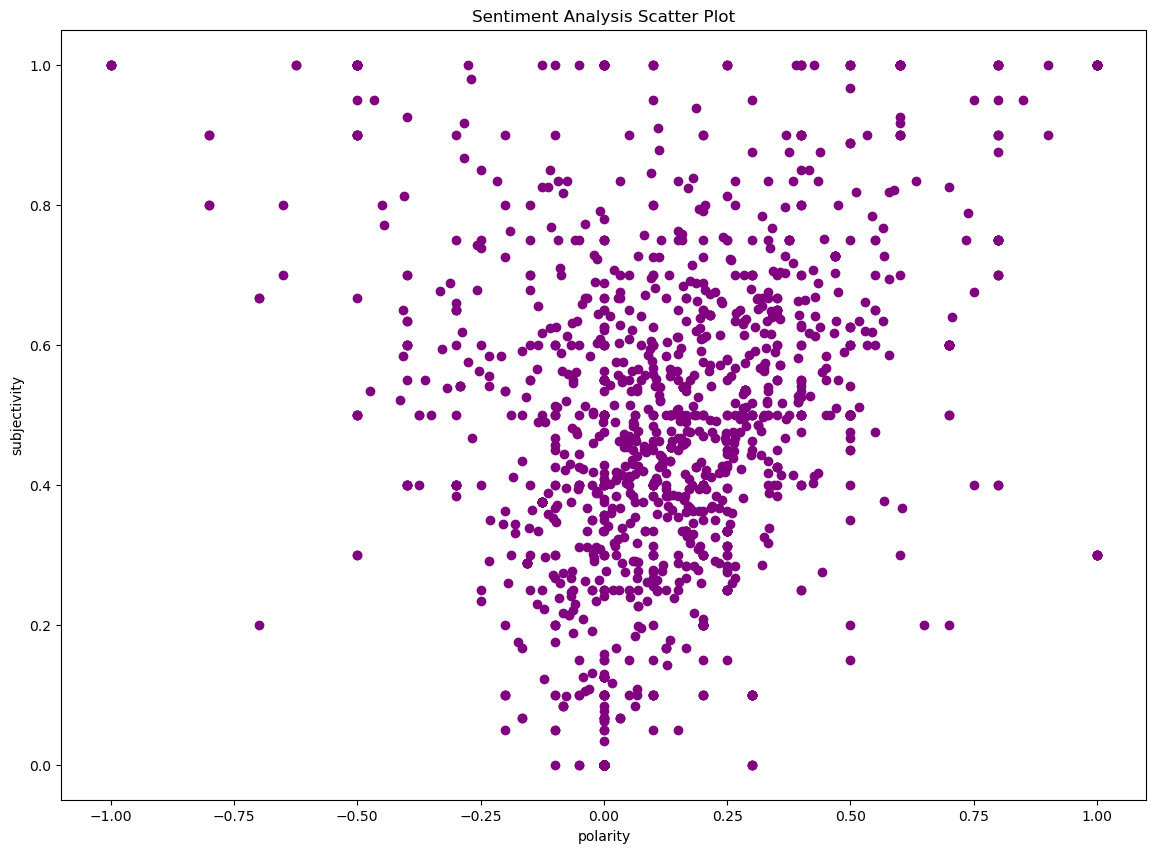

In [24]:
# create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(14,10))

for i in range(0, 2000):
    plt.scatter(tweets["polarity"].iloc[[i]].values[0], tweets["subjectivity"].iloc[[i]].values[0], color="Purple")

plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

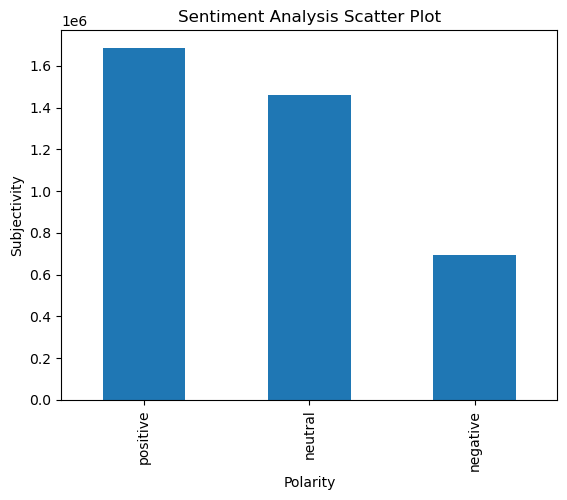

In [25]:
# create a bar chart to show the cout of Positive, Neutral and Nehative sentiments
tweets['sentiment'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [26]:
from time import sleep
import json
import pandas as pd
import io
import re
import numpy as np
from tqdm import tqdm
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [27]:
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(tweets['text_clean'],position=0, leave=True)):
    # print(i,s)
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
tweets["compound"] = compound
tweets.head(2)

100%|██████████| 3839739/3839739 [03:33<00:00, 17960.03it/s]


,datetime,username,text,text_clean,subjectivity,polarity,sentiment,compound
0,2022-01-01 23:00:00,priconoticias,0.4MOT TOKENS IN #LATOKEN airdrop and maybe m...,mot tokens in latoken airdrop and maybe more b...,0.5,0.5,positive,0.0000
1,2022-01-01 23:00:00,mmonlineonline,MARA for Bitcoin Exposure: Top Trade Q1 2022 h...,mara for bitcoin exposure top trade q,0.5,0.5,positive,0.2023
